In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
x = digits.data
y = digits.target


In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [120]:
x.shape

(1797, 64)

In [0]:
from sklearn.preprocessing import StandardScaler
train_std = StandardScaler().fit_transform(x) # стандартизация данных

In [0]:
train_mean = np.mean(train_std,axis=0)
train_cov = np.dot(((train_std - train_mean).T),(train_std-train_mean))
eign_value,eign_vector = np.linalg.eig(train_cov)
# рассчет матрицы набора данных по формуле np.dot ((X-x_mean) .T, (X, x_mean)) и находим собственные значения

In [0]:
eign_pair = [(np.abs(eign_value[i]),eign_vector[:,i]) for i in range(len(eign_value))]
eign_pair.sort(key=lambda x:x[0],reverse=True) #сортировка собственных векторов, соответствующим их собственным значениям от наивысшего к  низшему (разобраться)

In [0]:
tot_eignV  = np.sum(eign_value)
eign_contr = [(sorted(eign_value,reverse=True)[i]/tot_eignV)*100 for i in range(len(eign_value))]

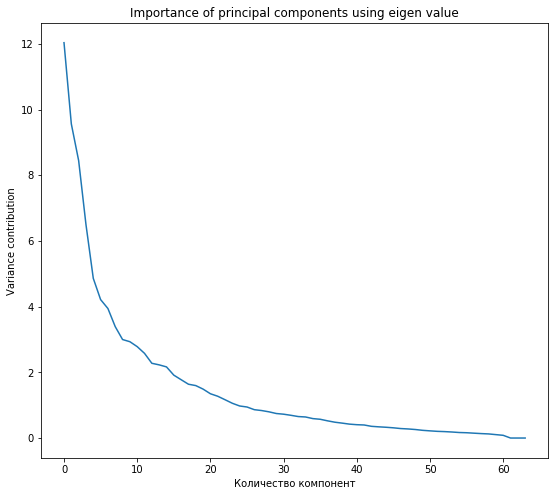

In [125]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(eign_contr)
plt.title("Importance of principal components using eigen value") #higher the eigen_contr , higher importance
plt.xlabel("Количество компонент")
plt.ylabel("Variance contribution")

plt.show()

In [126]:
print("Первые 10 компонент:%0.2f"%np.sum(eign_contr[:10])+"%")
print("Первые 20 компнент:%0.2f"%np.sum(eign_contr[:20])+"%")
print("Первые 30 компонент:%0.2f"%np.sum(eign_contr[:30])+"%")

Первые 10 компонент:58.87%
Первые 20 компнент:79.31%
Первые 30 компонент:89.32%


Text(0.5, 0, 'Количество компонент')

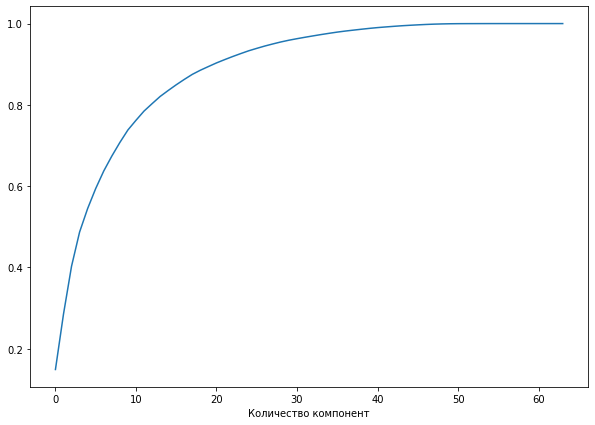

In [127]:
from sklearn.decomposition import PCA
pca = PCA().fit(digits.data)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')


In [33]:
print("Первые 10 компонент:%0.2f"%(1.0-np.sum(pca.explained_variance_ratio_[10:]))+"%")
print("Первые 20 компонент:%0.2f"%(1.0-np.sum(pca.explained_variance_ratio_[20:]))+"%")
print("Первые 30 компонент:%0.2f"%(1.0-np.sum(pca.explained_variance_ratio_[30:]))+"%")

Первые 10 компонент:0.74%
Первые 20 компонент:0.89%
Первые 30 компонент:0.96%


In [128]:
import numpy as np
from sklearn.svm import SVC

clf = SVC()
clf.fit(x[:,:30], y)
print(clf)
x_train, x_test, y_train, y_test = train_test_split(x[:,:30], y, stratify=y, test_size=0.2)
clf.fit(x_train, y_train)
f_x = clf.predict(x_test)
report = classification_report(y_test, f_x)
print(report)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.80      0.95      0.86        37
           2       0.86      0.86      0.86        35
           3       0.80      0.86      0.83        37
           4       0.97      0.81      0.88        36
           5       0.97      0.97      0.97        36
           6       0.92      0.92      0.92        36
           7       0.93      0.78      0.85        36
           8       0.89      0.69      0.77        35
           9       0.73      0.92      0.81        36

    accuracy                           0.88       360
   macro avg       0.88      0.87      0.87       360
weighted avg       0.88      0.88      0.87   

In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

clf = SVC(kernel='poly',degree=4)
clf.fit(x[:,:30], y)
print(clf)
x_train, x_test, y_train, y_test = train_test_split(x[:,:30], y, stratify=y, test_size=0.2)
clf.fit(x_train, y_train)
f_x = clf.predict(x_test)
report = classification_report(y_test, f_x)
print(report)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        36
           2       0.82      0.94      0.88        35
           3       0.97      0.78      0.87        37
           4       0.94      0.92      0.93        36
           5       0.95      0.97      0.96        37
           6       0.92      0.97      0.95        36
           7       0.91      0.83      0.87        36
           8       0.77      0.77      0.77        35
           9       0.85      0.92      0.88        36

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91  

In [81]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(x[:,:30], y)
print(clf)
x_train, x_test, y_train, y_test = train_test_split(x[:,:30], y, stratify=y, test_size=0.2)
clf.fit(x_train, y_train)
f_x = clf.predict(x_test)
report = classification_report(y_test, f_x)
print(report)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        36
           1       0.77      0.92      0.84        36
           2       0.57      0.91      0.70        35
           3       0.82      0.62      0.71        37
           4       0.88      0.83      0.86        36
           5       0.90      0.97      0.94        37
           6       0.97      0.89      0.93        36
           7       0.85      0.61      0.71        36
           8       0.93      0.37      0.53        35
           9       0.62      0.94      0.75        36

    accuracy                           0.79       360
   macro avg       0.83      0.79      0.79       360
weighted avg       0.83      0.79      0.79       360



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
clf = SVC(kernel='sigmoid')
clf.fit(x[:,:40], y)
print(clf)
x_train, x_test, y_train, y_test = train_test_split(x[:,:40], y, stratify=y, test_size=0.2)
clf.fit(x_train, y_train)
f_x = clf.predict(x_test)
report = classification_report(y_test, f_x)
print(report)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.70      0.70      0.70        37
           2       0.43      0.71      0.54        35
           3       0.97      0.76      0.85        37
           4       0.91      0.83      0.87        36
           5       0.83      0.83      0.83        36
           6       0.82      0.86      0.84        36
           7       0.61      0.56      0.58        36
           8       0.74      0.40      0.52        35
           9       0.72      0.81      0.76        36

    accuracy                           0.75       360
   macro avg       0.77      0.75      0.75       360
weighted avg       0.77      0.75      0.7

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with

X = digits.data[:, :2]  # берем только первые две функции
Y = digits.target

def my_kernel(X, Y):
    """
    Создаем собственное ядро:
                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)
    
h = .02  # размер шага в сетке
# создаем экземпляр SVM и подбираем данные.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=y, test_size=0.2)
clf.fit(x_train, y_train)
f_x = clf.predict(x_test)
report = classification_report(y_test, f_x)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.12      0.97      0.21        36
           2       0.00      0.00      0.00        35
           3       0.26      0.27      0.27        37
           4       0.00      0.00      0.00        36
           5       0.40      0.22      0.28        37
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        36
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00        36

    accuracy                           0.15       360
   macro avg       0.08      0.15      0.08       360
weighted avg       0.08      0.15      0.08       360



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
x = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 899 points : 149


In [99]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.80      0.86      0.83        90
           2       0.91      0.57      0.70        92
           3       0.76      0.85      0.80        93
           4       0.92      0.79      0.85        76
           5       0.89      0.90      0.89       108
           6       0.98      0.98      0.98        89
           7       0.75      0.99      0.85        78
           8       0.61      0.84      0.70        92
           9       0.92      0.60      0.72        92

    accuracy                           0.83       899
   macro avg       0.85      0.84      0.83       899
weighted avg       0.85      0.83      0.83       899



In [103]:
rng = np.random.RandomState(1)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x, y)
y_pred=clf.predict(x)
print(y_pred)

[0 1 1 ... 8 9 8]


In [104]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



In [0]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(x, y)
BernoulliNB()
y_pred=clf.predict(x)

In [131]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.76      0.62      0.68       182
           2       0.86      0.86      0.86       177
           3       0.91      0.86      0.88       183
           4       0.91      0.95      0.93       181
           5       0.93      0.82      0.87       182
           6       0.97      0.94      0.96       181
           7       0.88      0.98      0.93       179
           8       0.70      0.82      0.75       174
           9       0.76      0.81      0.78       180

    accuracy                           0.86      1797
   macro avg       0.87      0.86      0.86      1797
weighted avg       0.87      0.86      0.86      1797

